### Linear Regression

Linear regression was employed to model the relationship between various features and the price of automobiles. Categorical variables were converted into dummy variables using one-hot encoding. The target variable (`price`) was separated from the feature variables Train-test split was performed to train the model on a subset of the data and evaluate its performance on another subset. The analysis contributes valuable insights into the factors influencing the pricing of automobiles, offering a predictive framework based on the linear relationship between features and price.

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings 
warnings.filterwarnings('ignore')

# Fetching the dataset 
automobile = fetch_ucirepo(id=10)

In [43]:
automobile.data.features

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,mpfi,141,...,188.8,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,mpfi,141,...,188.8,109.1,front,rwd,sedan,4.0,turbo,gas,volvo,95.0
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,mpfi,173,...,188.8,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,idi,145,...,188.8,109.1,front,rwd,sedan,4.0,turbo,diesel,volvo,95.0


In [44]:
dummies = pd.get_dummies(automobile.data.features, drop_first=True)

In [45]:
dummies.isna().sum()
dummies.dropna(inplace=True)

In [46]:
y = dummies['price']
x = dummies.drop('price', axis=1)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [48]:
x.head(10)

,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,num-of-cylinders,curb-weight,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
3,30,24,5500.0,102.0,10.0,3.40,3.19,109,4,2337,...,False,False,False,False,False,False,False,False,False,False
4,22,18,5500.0,115.0,8.0,3.40,3.19,136,5,2824,...,False,False,False,False,False,False,False,False,False,False
6,25,19,5500.0,110.0,8.5,3.40,3.19,136,5,2844,...,False,False,False,False,False,False,False,False,False,False
8,20,17,5500.0,140.0,8.3,3.40,3.13,131,5,3086,...,False,False,False,False,False,False,False,False,False,False
10,29,23,5800.0,101.0,8.8,2.80,3.50,108,4,2395,...,False,False,False,False,False,False,False,False,False,False
11,29,23,5800.0,101.0,8.8,2.80,3.50,108,4,2395,...,False,False,False,False,False,False,False,False,False,False
12,28,21,4250.0,121.0,9.0,3.19,3.31,164,6,2710,...,False,False,False,False,False,False,False,False,False,False
13,28,21,4250.0,121.0,9.0,3.19,3.31,164,6,2765,...,False,False,False,False,False,False,False,False,False,False
18,53,47,5100.0,48.0,9.5,3.03,2.91,61,3,1488,...,False,False,False,False,False,False,False,False,False,False
19,43,38,5400.0,70.0,9.6,3.11,3.03,90,4,1874,...,False,False,False,False,False,False,False,False,False,False


In [49]:
model = LinearRegression()

In [50]:
model.fit(X_train, y_train) 

LinearRegression()

In [51]:
y_pred = model.predict(X_test) 

In [53]:
r2_score(y_test, y_pred)

0.8094773702833351

In [57]:
cdf = pd.DataFrame(model.coef_, x.columns, columns=['Coefficients'])
cdf

,Coefficients
highway-mpg,1.366278e+02
city-mpg,-2.167204e+02
peak-rpm,-1.093315e-01
horsepower,-4.602383e+00
compression-ratio,-5.643058e+02
stroke,-1.148176e+03
bore,-1.546403e+03
engine-size,1.474390e+01
num-of-cylinders,6.883221e+02
curb-weight,3.396058e+00


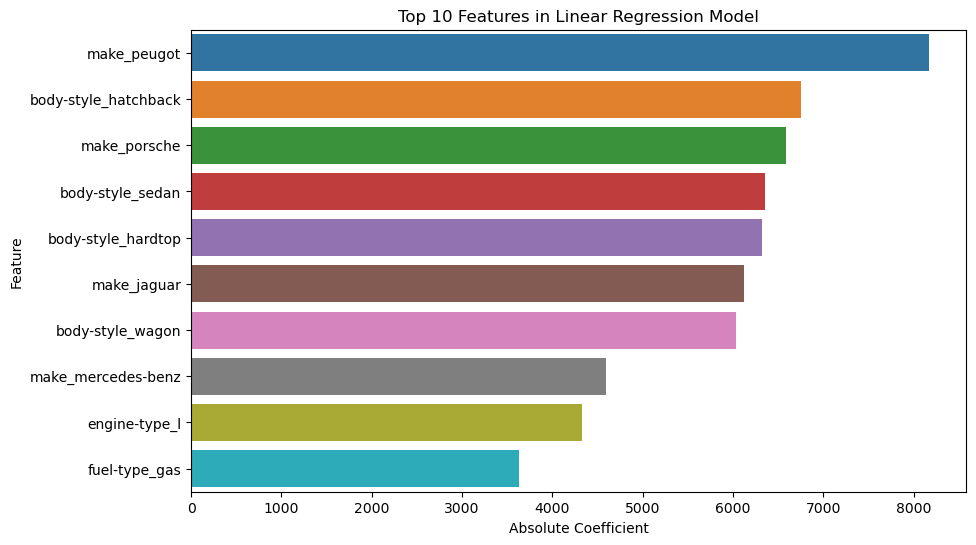

In [58]:
coefficients = model.coef_

# Create a DataFrame for feature names and their corresponding coefficients
feature_names = x.columns # Feature names after one-hot encoding
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort and visualize
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df.head(10), x='Abs_Coefficient', y='Feature')
plt.title('Top 10 Features in Linear Regression Model')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.show()